In [1]:

#  Don't use this in your code, this is just for producing the statistics of the contextual layer alone.

from collections import defaultdict
from numpy import array

from contextual_layer.experiment import make_experiment


payoff_conditions = ["low", "high"]

efficiencies = defaultdict(list)
fairnesses = defaultdict(list)

for payoff in payoff_conditions:
    for n in range(50):
        experiment, task = make_experiment(payoff)
        experiment.run(debug=False, n=50)
        rew_hist = array(experiment.logger.get_log("rew_hist"))
        num_high_rewards = (rew_hist == task.high_rew).astype(float).sum(axis=0)
        efficiency = rew_hist.sum() / (rew_hist.shape[0] * (task.low_rew + task.high_rew))
        fairness = min(num_high_rewards) / max(num_high_rewards)
        efficiencies[payoff].append(efficiency)
        fairnesses[payoff].append(fairness)
        #print efficiencies, fairnesses

Populating the interactive namespace from numpy and matplotlib


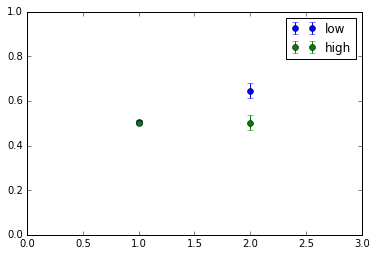

In [2]:
# Plotting stats for efficiency and fairness

%pylab inline
for payoff in payoff_conditions:
    n = len(efficiencies[payoff])
    sqrt_n = sqrt(n)
    errorbar([1, 2], [mean(efficiencies[payoff]), mean(fairnesses[payoff])], [std(efficiencies[payoff]) / sqrt_n, std(fairnesses[payoff]) / sqrt_n], linestyle='None', marker='o')
axis([0, 3, 0, 1])
legend(payoff_conditions)

Populating the interactive namespace from numpy and matplotlib


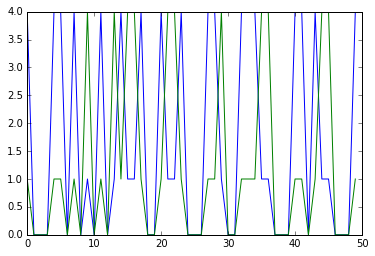

In [3]:
%pylab inline
from numpy import convolve
N = 1
rew_hist = array(experiment.logger.get_log("rew_hist"))
plot(convolve([r[0] for r in rew_hist], np.ones((N,))/N, mode='valid'))
plot(convolve([r[1] for r in rew_hist], np.ones((N,))/N, mode='valid'))

In [3]:
efficiency, fairness

(0.47999999999999998, 0.26315789473684209)

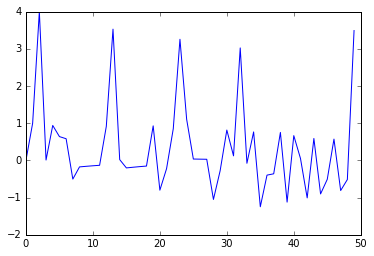

In [5]:
plot(experiment.logger.get_log("td_error_hist"))

Populating the interactive namespace from numpy and matplotlib


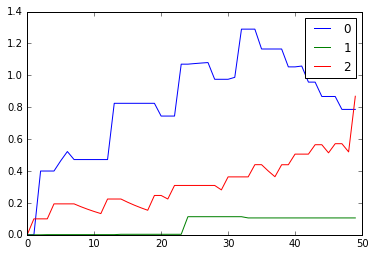

In [6]:
%pylab inline
plot([v[0] for v in experiment.logger.get_log("value_hist")])
legend(range(3))

Populating the interactive namespace from numpy and matplotlib


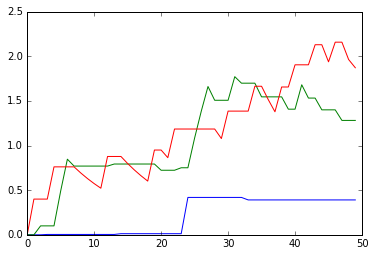

In [7]:
%pylab inline
plot([v[1] for v in experiment.logger.get_log("value_hist")])
#legend(range(n_states))

In [8]:
print experiment.agents[0].policy.action_count
print ""
print experiment.agents[1].policy.action_count

[[ 1.44913261  2.91043417]
 [ 1.33492774  0.97683843]
 [ 3.35532296  1.25186372]]

[[ 0.97606009  2.13478234]
 [ 1.23386831  4.60980378]
 [ 0.          7.97702455]]


In [32]:
from numpy import load

data = load("../social_conventions/data/npy_ballistic_data/npys_high_conflict_ballistic/game_f082d916-cbd1-4dcb-b866-1d214bcff1bf.csv-converted.npy")


Populating the interactive namespace from numpy and matplotlib


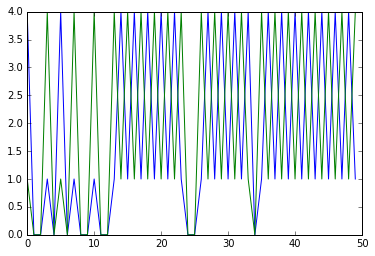

In [33]:
%pylab inline
from numpy import convolve
N = 1
plot(convolve([r[0] for r in data], np.ones((N,))/N, mode='valid'))
plot(convolve([r[1] for r in data], np.ones((N,))/N, mode='valid'))

In [17]:
high_rew = 4
num_high_rewards = (data == task.high_rew).astype(float).sum(axis=0)
efficiency = rew_hist.sum() / (rew_hist.shape[0] * (task.low_rew + task.high_rew))
fairness = min(num_high_rewards) / max(num_high_rewards)

In [18]:
efficiency, fairness

(0.5, 0.18181818181818182)

In [65]:
efficiencies = defaultdict(list)
fairnesses = defaultdict(list)

payoffs = ["low", "high"]

import os
for payoff in payoffs:
    print payoff
    low_rew = 1
    high_rew = 4 if payoff == "high" else 2
    directory = "../social_conventions/data/npy_ballistic_data/npys_{}_conflict_ballistic".format(payoff)
    for filename in os.listdir(directory):
        if filename.endswith(".npy"):
            data = load(os.path.join(directory, filename))
            data = data.astype(float)
            #print filename
            num_high_rewards = (data == high_rew).astype(float).sum(axis=0)
            efficiency = data.sum() / (data.shape[0] * (low_rew + high_rew))
            fairness = min(num_high_rewards) / max(num_high_rewards)
            efficiencies[payoff].append(efficiency)
            fairnesses[payoff].append(fairness)
        else:
            print " not a .npy"

low
high


In [66]:
min(num_high_rewards) / max(num_high_rewards)

0.8571428571428571

Populating the interactive namespace from numpy and matplotlib


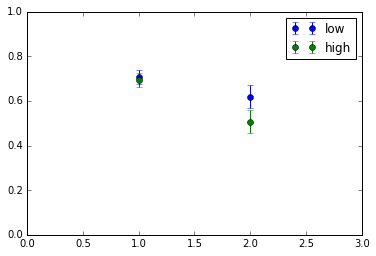

In [72]:
# Plotting stats for efficiency and fairness

%pylab inline
for payoff in payoff_conditions:
    n = len(efficiencies[payoff])
    sqrt_n = sqrt(n)
    errorbar([1, 2], [mean(efficiencies[payoff]), mean(fairnesses[payoff])], [std(efficiencies[payoff]) / sqrt_n, std(fairnesses[payoff]) / sqrt_n], linestyle='None', marker='o')
axis([0, 3, 0, 1])
legend(payoff_conditions)

In [69]:
sqrt(len(efficiencies["low"]))

7.2111025509279782

In [71]:
std(efficiencies[payoff])/7.21

0.032409112912046602

In [45]:
num_high_rewards = (data == high_rew).astype(float).sum(axis=0)
efficiency = data.sum() / (data.shape[0] * (low_rew + high_rew))
fairness = min(num_high_rewards) / max(num_high_rewards)

In [63]:
data.sum().astype(float) / (data.shape[0] * (low_rew + high_rew))

0.78000000000000003

In [64]:
data

array([[4, 1],
       [0, 0],
       [0, 0],
       [1, 4],
       [0, 0],
       [4, 1],
       [0, 0],
       [1, 4],
       [0, 0],
       [0, 0],
       [1, 4],
       [0, 0],
       [0, 0],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [0, 0],
       [0, 0],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [0, 0],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4],
       [4, 1],
       [1, 4]], dtype=int32)